### Import libraries and Data

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

In [3]:
path = r"C:\Users\Sreelaya Narla\Desktop\ML with Python\climatewins analysis"

In [4]:
#import data
climate = pd.read_csv(os.path.join(path,'02 data', 'prepared data', 'data_scaled.csv'))

In [5]:
climate.head()

,id,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-1.731975,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,-1.731824,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,-1.731673,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,-1.731523,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,-1.731372,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [6]:
# Import the pleasant weather data
pleasantweather = pd.read_csv(os.path.join(path,'02 data', 'prepared data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [7]:
pleasantweather.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
#Reduce to just the temperature variables (excluding Gdansk, Roma,Tours)
df = climate[['DATE', 'MONTH','BASEL_temp_mean','BASEL_temp_min','BASEL_temp_max',        
'BELGRADE_temp_mean','BELGRADE_temp_min','BELGRADE_temp_max',
'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max',
'DEBILT_temp_mean','DEBILT_temp_min','DEBILT_temp_max',
'DUSSELDORF_temp_mean','DUSSELDORF_temp_min','DUSSELDORF_temp_max',
'HEATHROW_temp_mean','HEATHROW_temp_min','HEATHROW_temp_max',
'KASSEL_temp_mean','KASSEL_temp_min','KASSEL_temp_max',
'LJUBLJANA_temp_mean','LJUBLJANA_temp_min','LJUBLJANA_temp_max',
'MAASTRICHT_temp_mean','MAASTRICHT_temp_min','MAASTRICHT_temp_max',
'MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max',
'MUNCHENB_temp_mean','MUNCHENB_temp_min','MUNCHENB_temp_max',
'OSLO_temp_mean','OSLO_temp_min','OSLO_temp_max',
'SONNBLICK_temp_mean','SONNBLICK_temp_min','SONNBLICK_temp_max',   
'STOCKHOLM_temp_mean','STOCKHOLM_temp_min','STOCKHOLM_temp_max',
'VALENTIA_temp_mean','VALENTIA_temp_min','VALENTIA_temp_max']].copy()


In [9]:
### Create an 'X' matrix by dropping the unneeded columns
X = df.drop(['DATE', 'MONTH'], axis=1)
y = pleasantweather.drop(['DATE'], axis=1)

In [10]:
print(X.shape)
print(y.shape)

(22950, 45)
(22950, 15)


In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 45)
(5738, 45)
(17212, 15)
(5738, 15)


In [12]:
#Run the model with neighbors equal to 1 to 4, test the accuracy
k_range = np.arange(1,4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) #ADD THIS LINE
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) #CHANGE THIS LINE
    test_acc[i] = knn.score(X_test, np.array(y_test)) #CHANGE THIS LINE

i - 0
k - [1 2 3]
i - 1
k - [1 2 3]
i - 2
k - [1 2 3]


<function matplotlib.pyplot.show(close=None, block=None)>

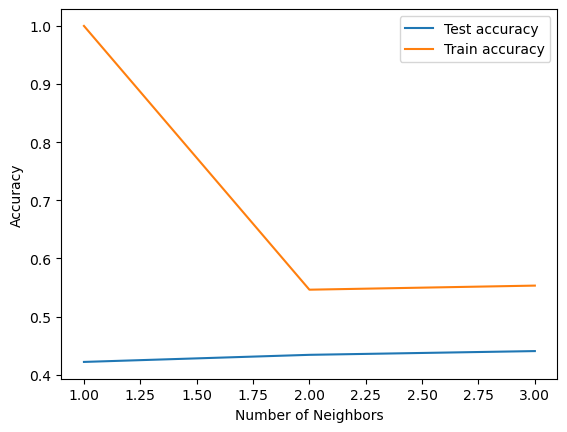

In [13]:
#plot the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

In [14]:
type(y_test), type(y_pred)


(pandas.core.frame.DataFrame, numpy.ndarray)

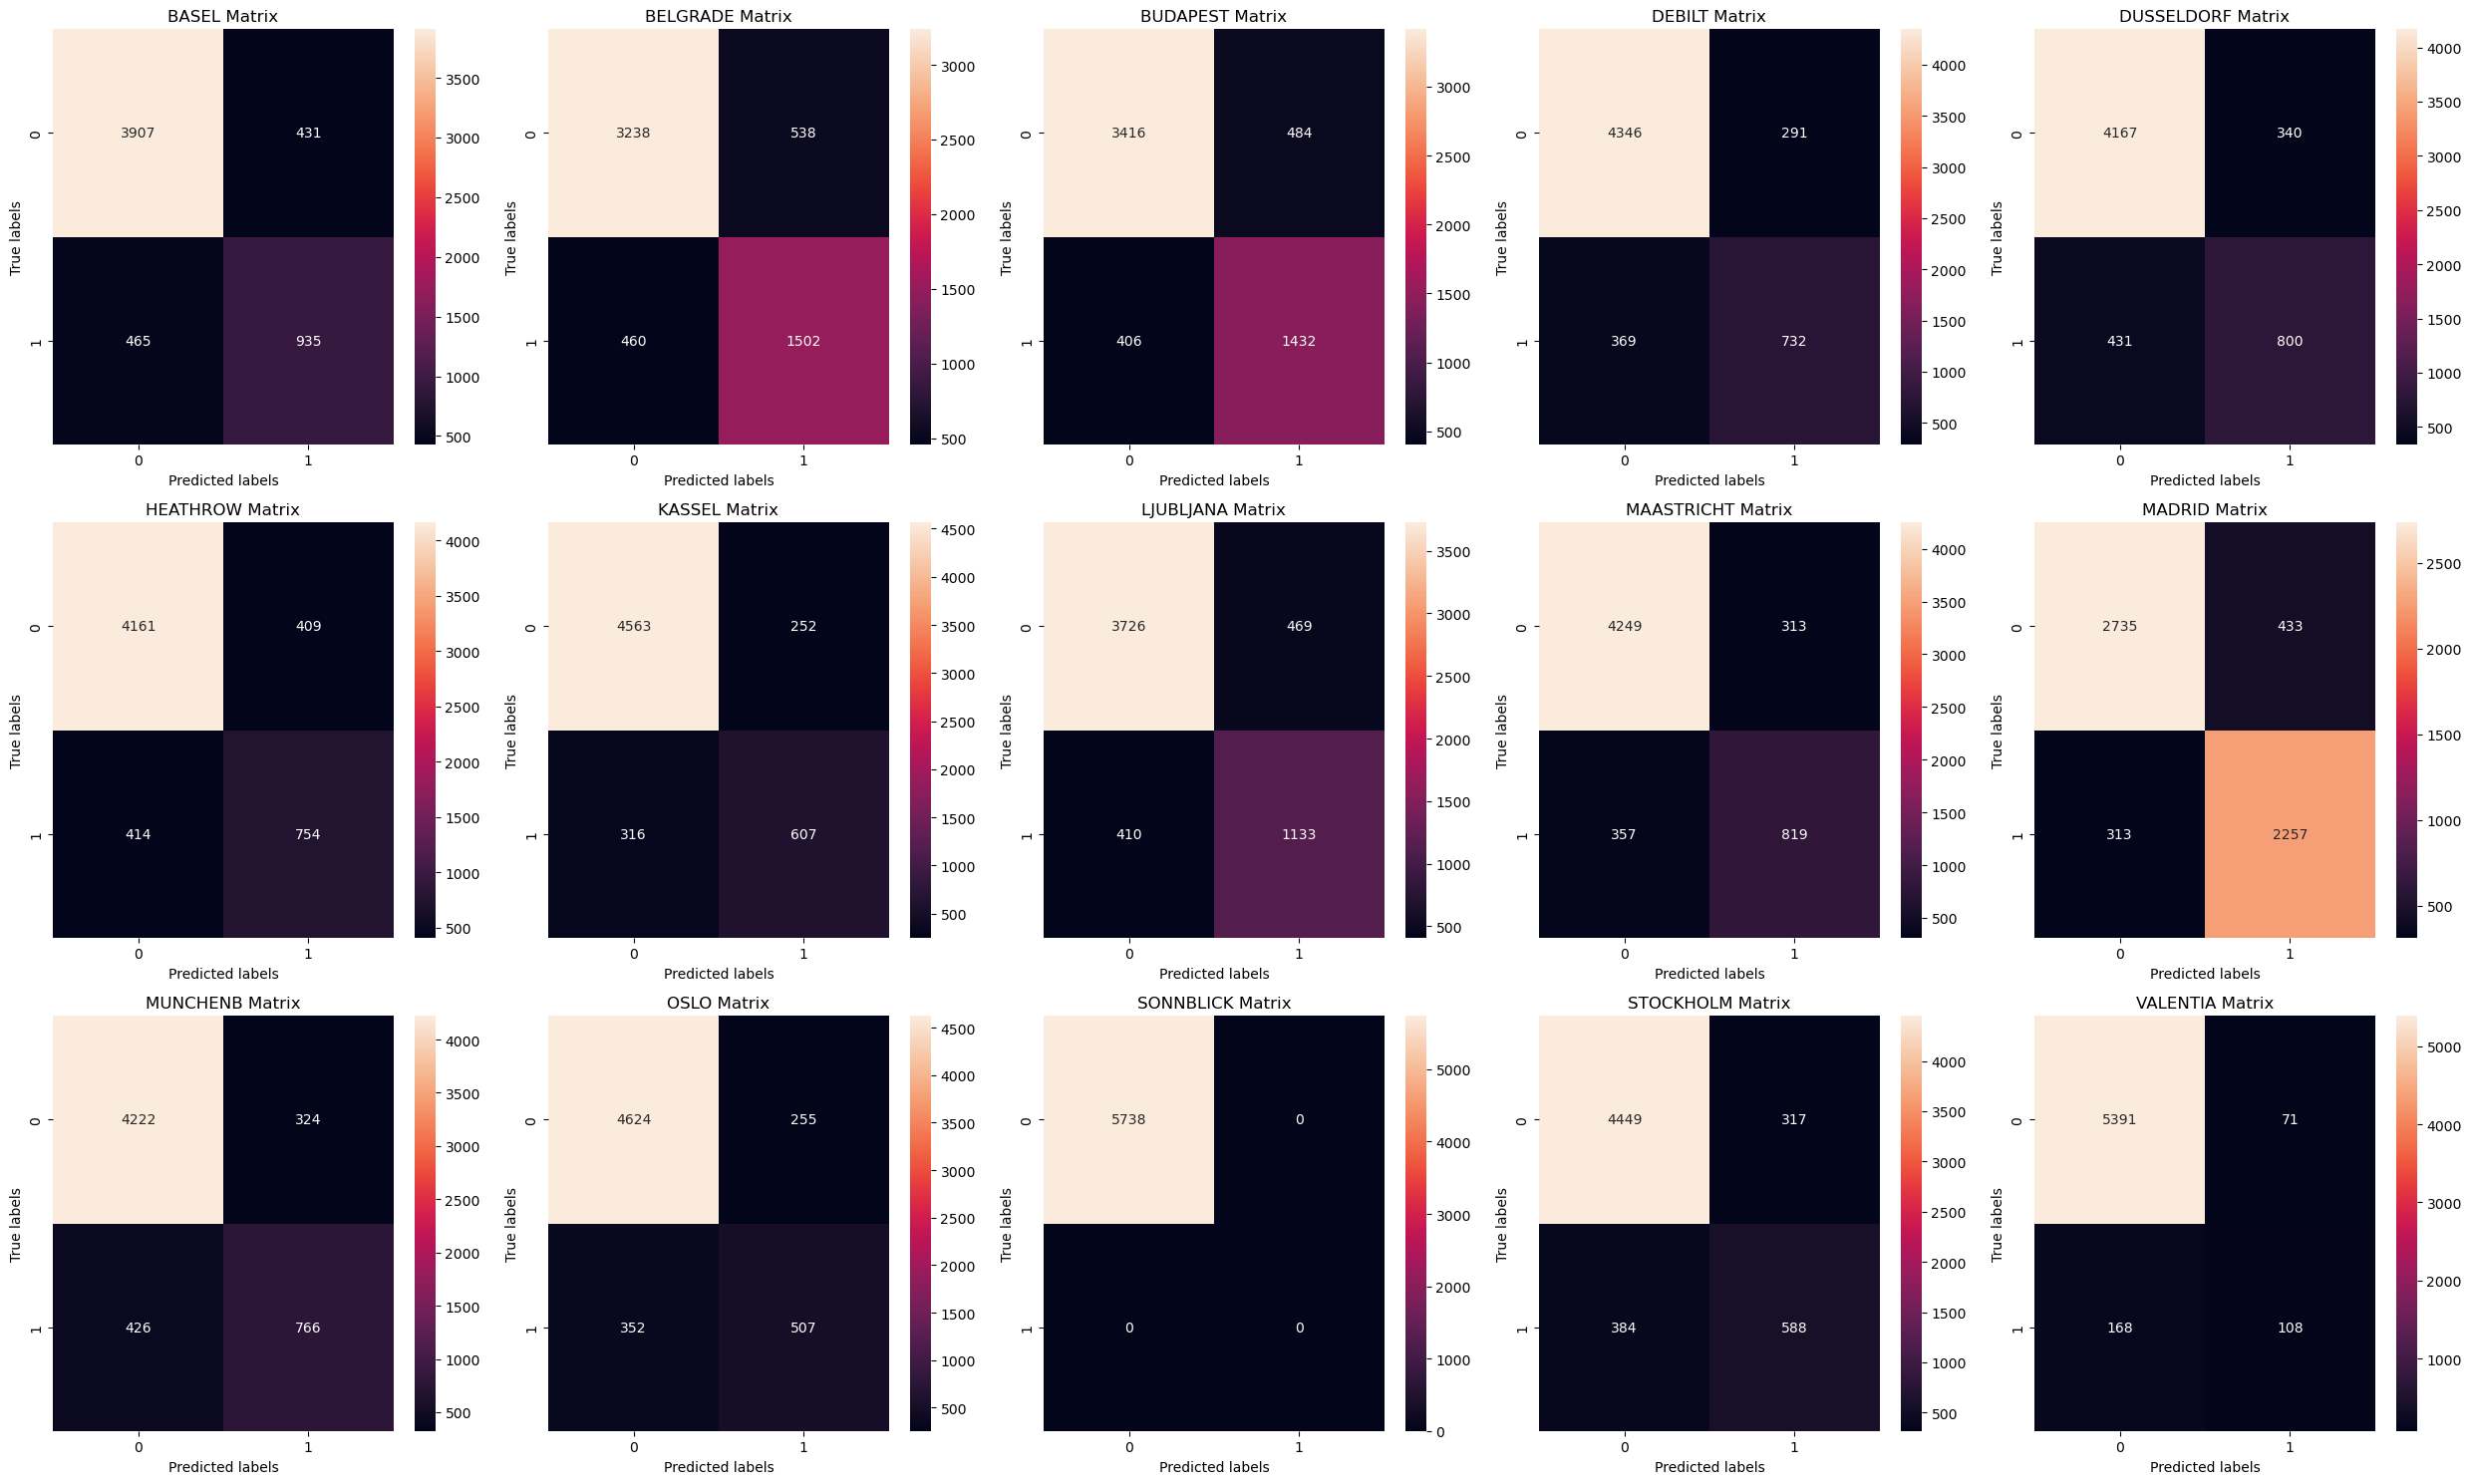

In [15]:
# Confusion matrix based on the last "k" in the sequence (Test data)
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()

key = "_pleasant_weather"
labels = ['pleasant', 'unpleasant']

figure, ax = plt.subplots(3, 5, figsize=(25,15))

count = 0
for i in range(3):
    for j in range(5):
        name = locations[count]
        
        # If y_test/y_pred are DataFrames, select the column by name or position
        y_true = y_test.iloc[:, count] if hasattr(y_test, 'iloc') else y_test[:, count]
        y_hat = y_pred.iloc[:, count] if hasattr(y_pred, 'iloc') else y_pred[:, count]
        
        cm = confusion_matrix(y_true, y_hat, labels=[0, 1])  # adjust labels if needed
        sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j])
        
        # Labels, title, and ticks
        ax[i, j].set_xlabel('Predicted labels')
        ax[i, j].set_ylabel('True labels')
        ax[i, j].set_title(f'{name} Matrix')
        
        count += 1
        if count >= len(locations):  # prevent going out of range
            break

plt.tight_layout()
#  Save the figure before displaying
plt.savefig("confusion_matrices.png", dpi=300, bbox_inches='tight')
plt.show()


C:\Users\Sreelaya Narla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


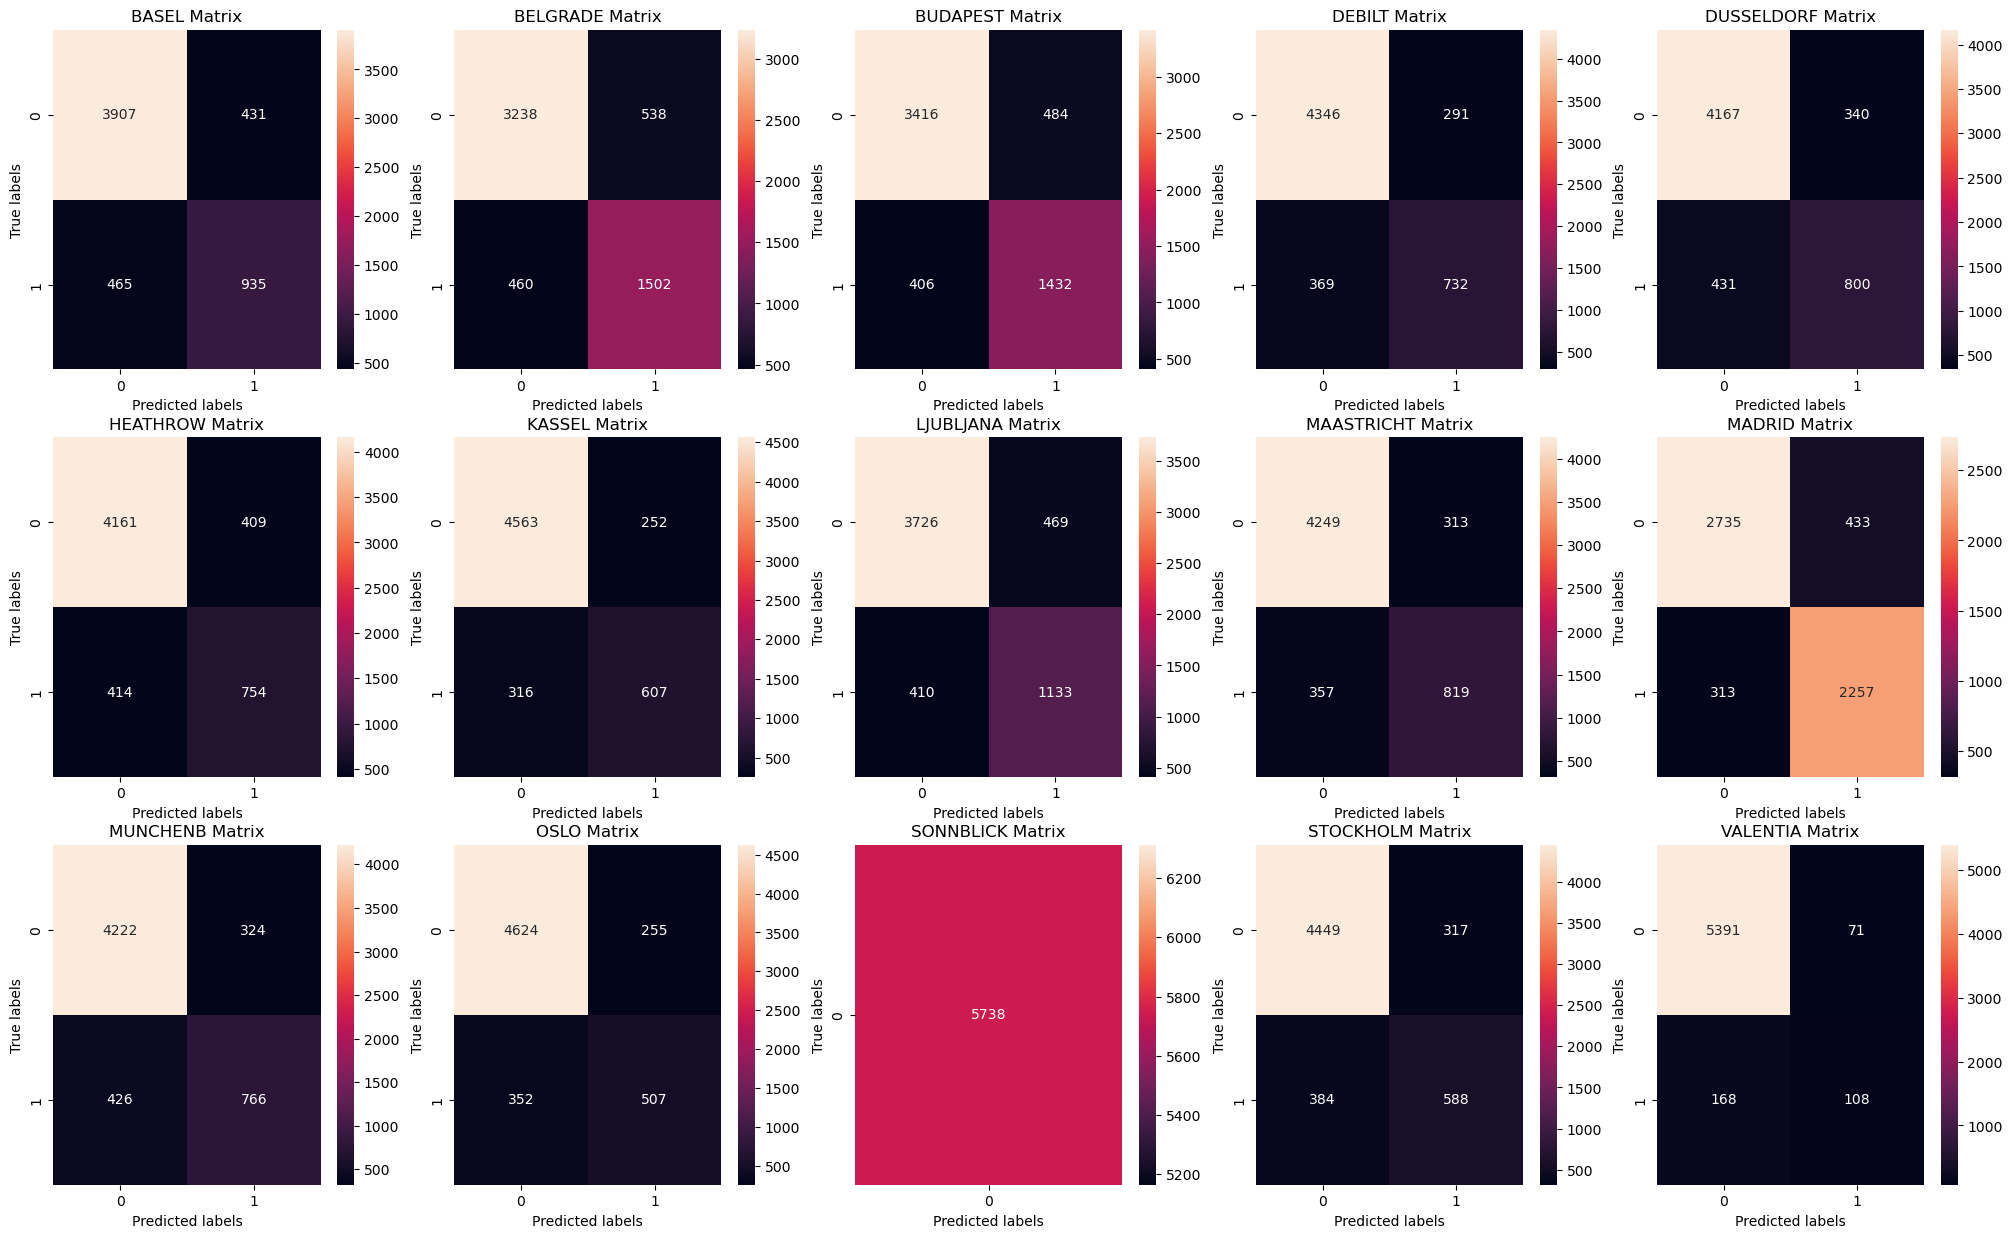

In [16]:
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [18]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

# Get all unique weather station locations
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()

results = []

for idx, name in enumerate(locations):
    # True and predicted labels
    y_true = y_test.iloc[:, idx]
    y_hat = y_pred[:, idx]

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_hat, labels=[0, 1])

    # Extract TN, FP, FN, TP (scikit-learn uses this order)
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
    else:
        # Handle edge cases like only one class in predictions
        tn = fp = fn = tp = 0
        if len(cm) == 1:
            if np.unique(y_true)[0] == 0:
                tn = cm[0, 0]
            else:
                tp = cm[0, 0]

    # Calculate total and accuracy
    total = tn + fp + fn + tp
    correct = tn + tp
    accuracy = correct / total * 100 if total > 0 else 0

    results.append({
        "Weather Station": name,
        "Accurate predictions": correct,
        "False positive": fp,
        "False negative": fn,
        "Accuracy rate": f"{accuracy:.0f}%"
    })

# Create summary DataFrame
summary_df = pd.DataFrame(results)

# Compute average accuracy
avg_accuracy = np.mean([float(a.strip('%')) for a in summary_df["Accuracy rate"]])
summary_df.loc[len(summary_df.index)] = {
    "Weather Station": "Average",
    "Accurate predictions": "",
    "False positive": "",
    "False negative": "",
    "Accuracy rate": f"{avg_accuracy:.0f}%"
}

# Display nicely
print(summary_df.to_string(index=False))

# Optional: Save to CSV or Excel
summary_df.to_csv("weather_station_accuracy_summary.csv", index=False)
# summary_df.to_excel("weather_station_accuracy_summary.xlsx", index=False)


Weather Station Accurate predictions False positive False negative Accuracy rate
          BASEL                 4842            431            465           84%
       BELGRADE                 4740            538            460           83%
       BUDAPEST                 4848            484            406           84%
         DEBILT                 5078            291            369           88%
     DUSSELDORF                 4967            340            431           87%
       HEATHROW                 4915            409            414           86%
         KASSEL                 5170            252            316           90%
      LJUBLJANA                 4859            469            410           85%
     MAASTRICHT                 5068            313            357           88%
         MADRID                 4992            433            313           87%
       MUNCHENB                 4988            324            426           87%
           OSLO             